HP                -40.0
Attack            -80.0
Defense           -62.0
Special Attack    -85.0
Special Defense   -59.0
Speed             -90.0
dtype: float64
HP                 170.00
Attack             235.00
Defense            204.00
Special Attack     230.00
Special Defense    201.75
Speed              225.00
dtype: float64
Se han encontrado outliers en la variable HP
Name
Blissey      255
Wobbuffet    190
Guzzlord     223
Chansey      250
Name: HP, dtype: int64
Se han encontrado outliers en la variable Defense
Name
Shuckle         230
Steelix-Mega    230
Stakataka       211
Name: Defense, dtype: int64
Se han encontrado outliers en la variable Special Defense
Name
Shuckle    230
Name: Special Defense, dtype: int64
Conjunto de datos total:
Malos: 815, Buenos: 103

Conjunto de datos de entrenamiento:
Malos: 593, Buenos: 67

Imbalanced ratio datos totales: 7.912621359223301
Imbalanced ratio conjunto entrenamiento: 8.850746268656716


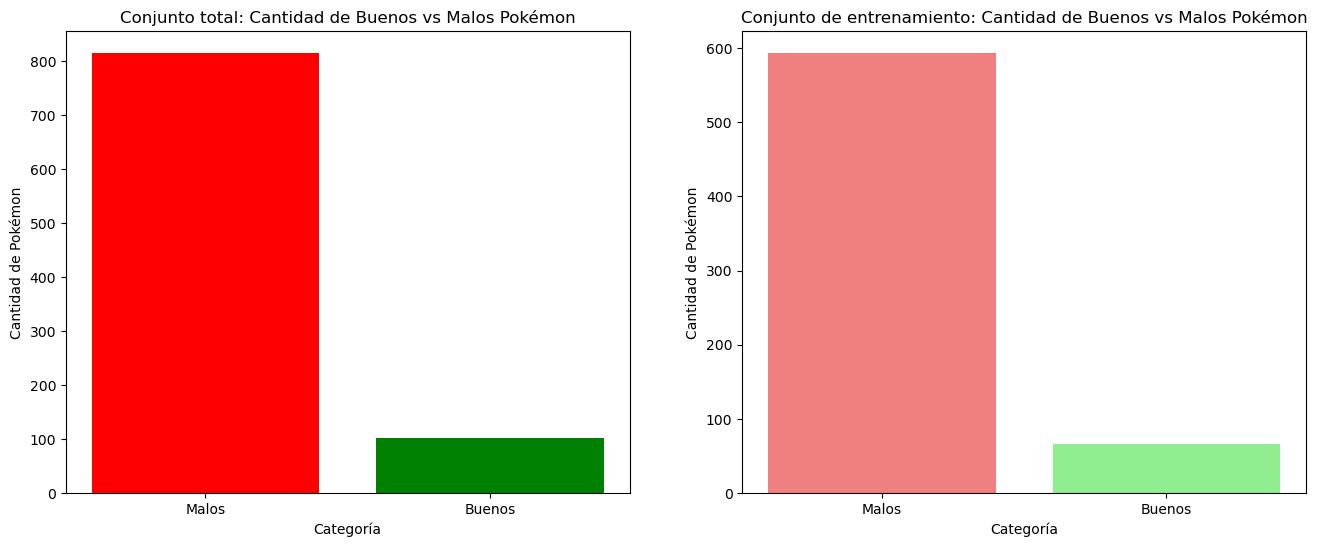

           Tier
Name           
Torkoal       0
Starmie       0
Nidoran-M     0
Jangmo-o      0
Aggron        0
...         ...
Tapu Fini     1
Teddiursa     0
Cresselia     0
Palkia        1
Pidgey        0

[660 rows x 1 columns]


In [69]:
%run ./ProyectoPreparacionDeDatosV3.ipynb

Queremos encontrar el mejor hiper-parámetro (número de vecinos) para el clasificador. Para ello definimos una función que entrena múltiples modelos y muestra su f1_score y su precisión.

In [70]:
def EncontrarMejorK(X_train,y_train,X,y,k=[i for i in range(1,11)]):
    scores = []
    accuracies = []
    mejor_f1 = 0
    for i in k:
        pipeline.set_params(Classifier__n_neighbors=i)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X)
        f1 = metrics.f1_score(y.to_numpy().astype(int), y_pred)
        accuracy = (y.to_numpy().astype(int) == y_pred).mean()
        print(f"k={k[i-1]}  f1_score={f1}   accuracy={accuracy}")
        if f1 > mejor_f1:
            mejor_f1 = f1
            mejor_k = i
        scores.append(f1)
        accuracies.append(accuracy)
    print(f"Mejor k={mejor_k}  f1_score={mejor_f1}")
    return scores, accuracies


In [71]:
scores, accuracy = EncontrarMejorK(X_train,y_train,X_val,y_val,[i for i in range(1,11)])
#Interpretar la solución cuando tenga la pipeline con todos los componentes

k=1  f1_score=0.5945945945945946   accuracy=0.8010596603280592
k=2  f1_score=0.3870967741935484   accuracy=0.8276237480040645
k=3  f1_score=0.5142857142857142   accuracy=0.8099143562200609
k=4  f1_score=0.3448275862068966   accuracy=0.8364784438960662
k=5  f1_score=0.3333333333333333   accuracy=0.8320510959500653
k=6  f1_score=0.3448275862068966   accuracy=0.8364784438960662
k=7  f1_score=0.3870967741935484   accuracy=0.8276237480040645
k=8  f1_score=0.3870967741935484   accuracy=0.8276237480040645
k=9  f1_score=0.375   accuracy=0.8231964000580636
k=10  f1_score=0.3333333333333333   accuracy=0.8320510959500653
Mejor k=1  f1_score=0.5945945945945946


Podemos intentar comparar gráficamente los modelos mediante un histograma.

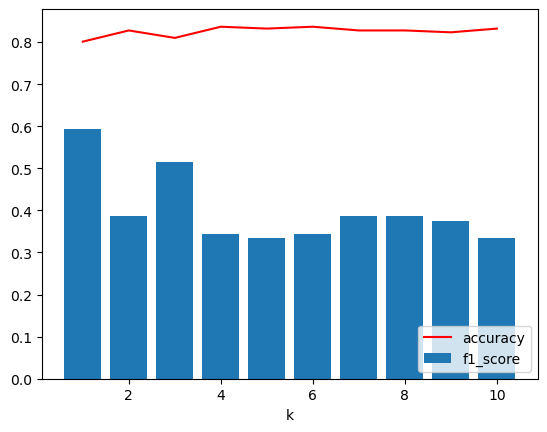

In [81]:
plt.figure()
plt.bar([i for i in range(1,11)], scores, label='f1_score')
plt.plot([i for i in range(1,11)], accuracy, label='accuracy',c='r')
plt.xlabel('k')
plt.legend(loc='lower right')